In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sep005_io_fbgs
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

from filter_tc.particle_filter import ParticleFilter

In [3]:
data_path = "../../../data/scb/almere/strain/raw/SCBALM/TDD/TDD_fiber/2022/09/01/20220901-1030 02-SCB.txt.gz"
sep005_fbgs = sep005_io_fbgs.read_fbgs(data_path)

In [4]:
# TODO: @Wout: The naming of the sensor signals isn't the same as previously,
# it was nice to have the old format with sensor position, structure and the type of sensor (temperature or strain). 
# Now it's just the sensor line nad number, which is not very informative.

# create the measurement and temperature datasets
measurements = []
inputs = []
for fbg_data in sep005_fbgs:
    if 'B-C-N' in fbg_data['name']:
        print(fbg_data['name'])
        measurements.append(fbg_data)
    if 'T-B-S' in fbg_data['name']:
        print(fbg_data['name'])
        inputs.append(fbg_data)

T-B-S
B-C-N-01
B-C-N-02
B-C-N-03
B-C-N-04
B-C-N-05
B-C-N-06
B-C-N-07


In [27]:
from filter_tc.particle_filter import ParticleFilterBank

num_particles=1000
pfb = ParticleFilterBank.from_sep005(
    measurements,
    inputs,
    num_particles=num_particles,
    r_measurement_noise=1e2,
    q_process_noise=np.array([1e-2, 1]),
    scale=1e-5,
    loc=-50)

In [28]:
filtered = pfb.filter(measurements, inputs)

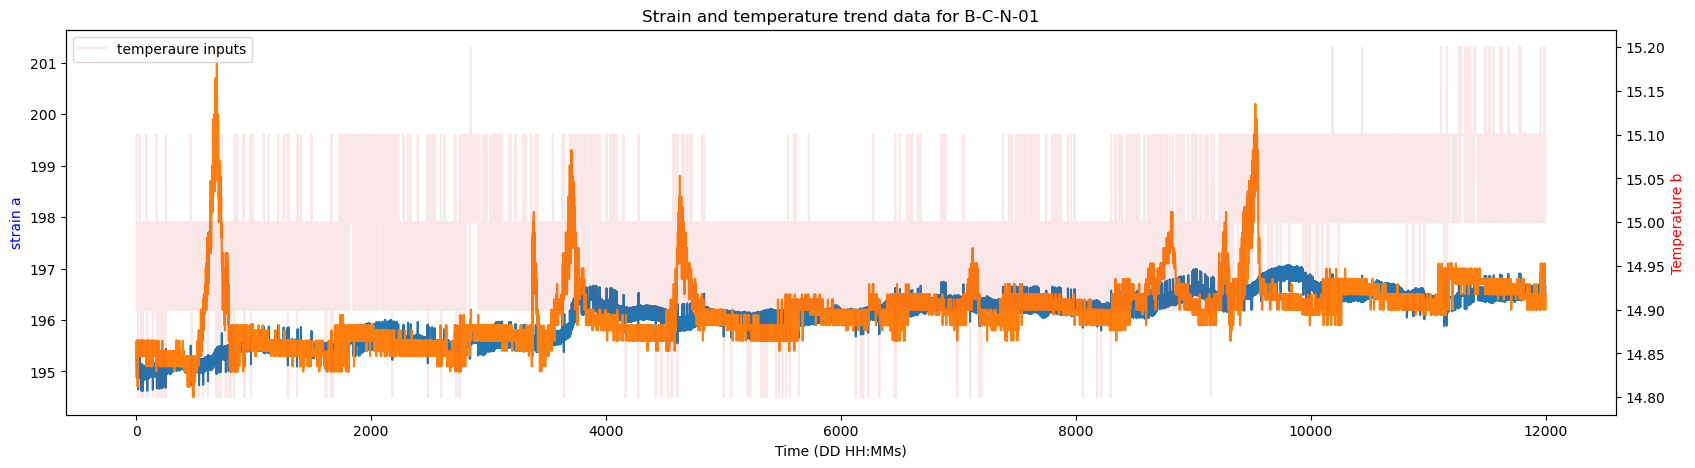

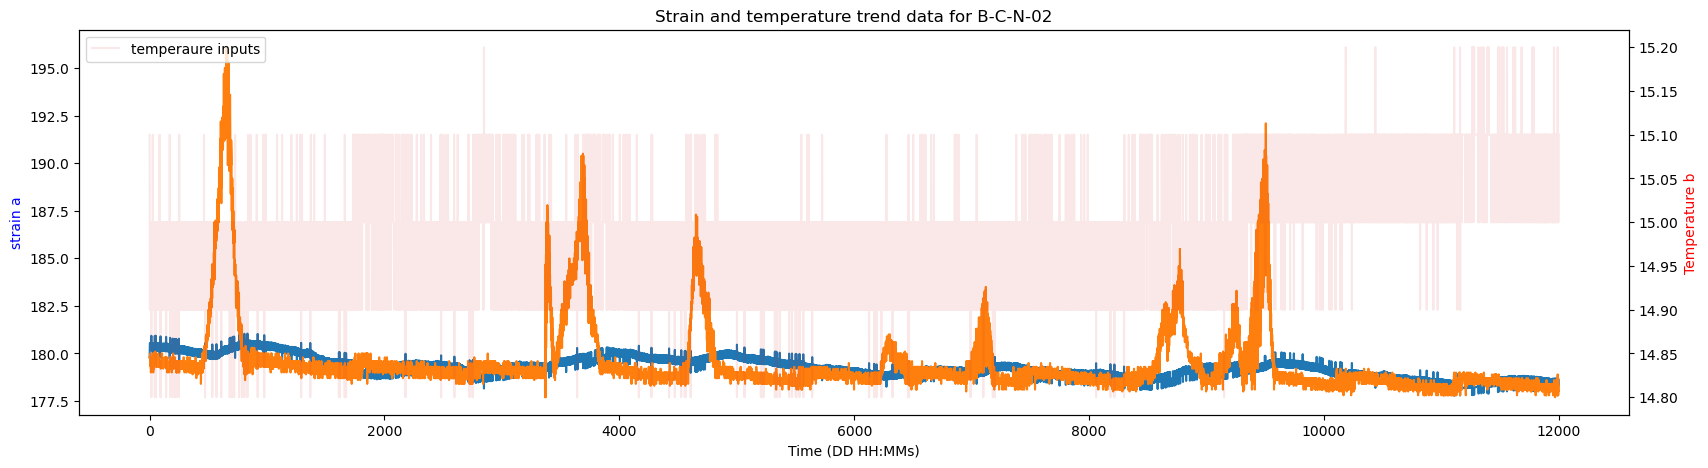

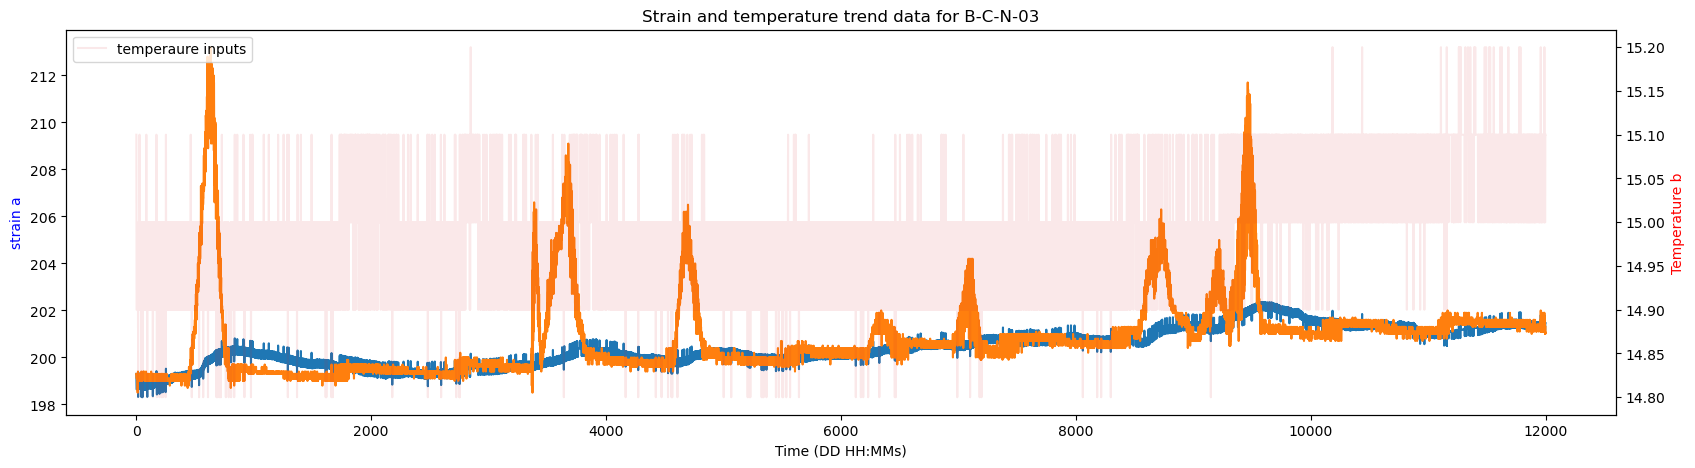

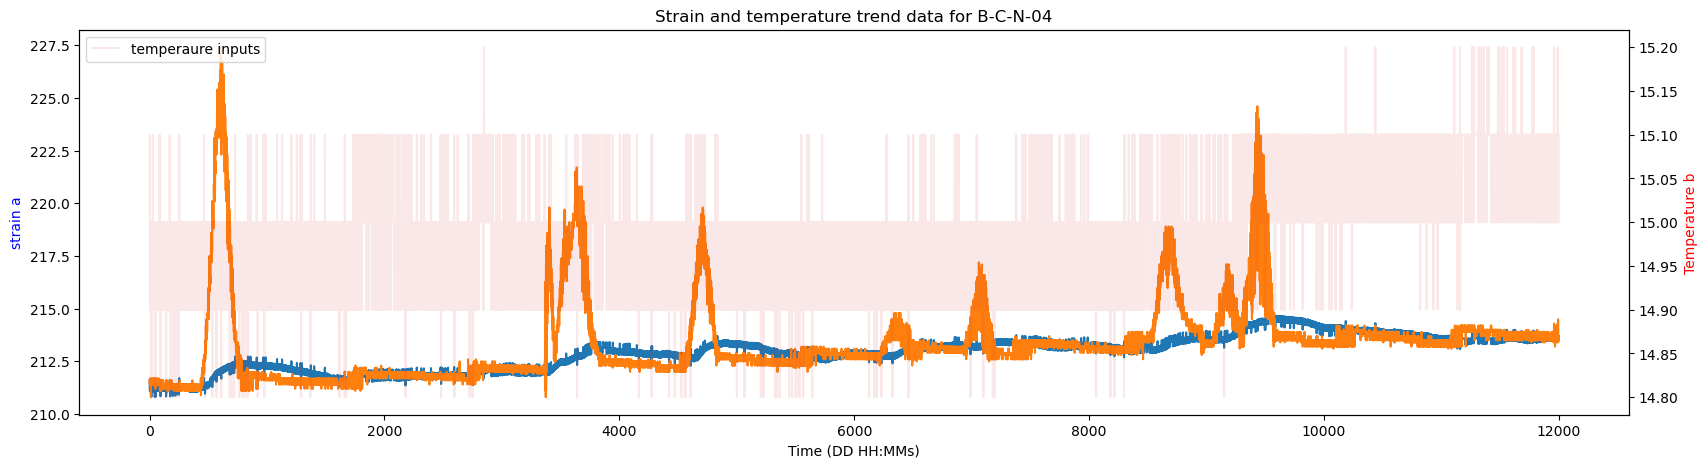

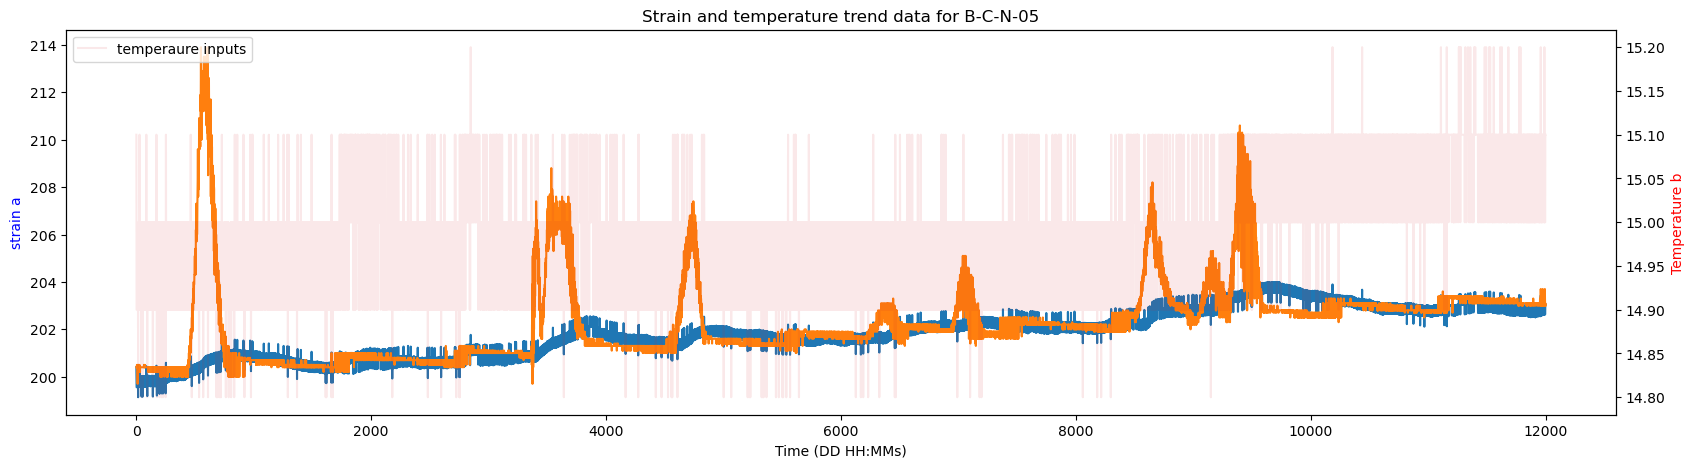

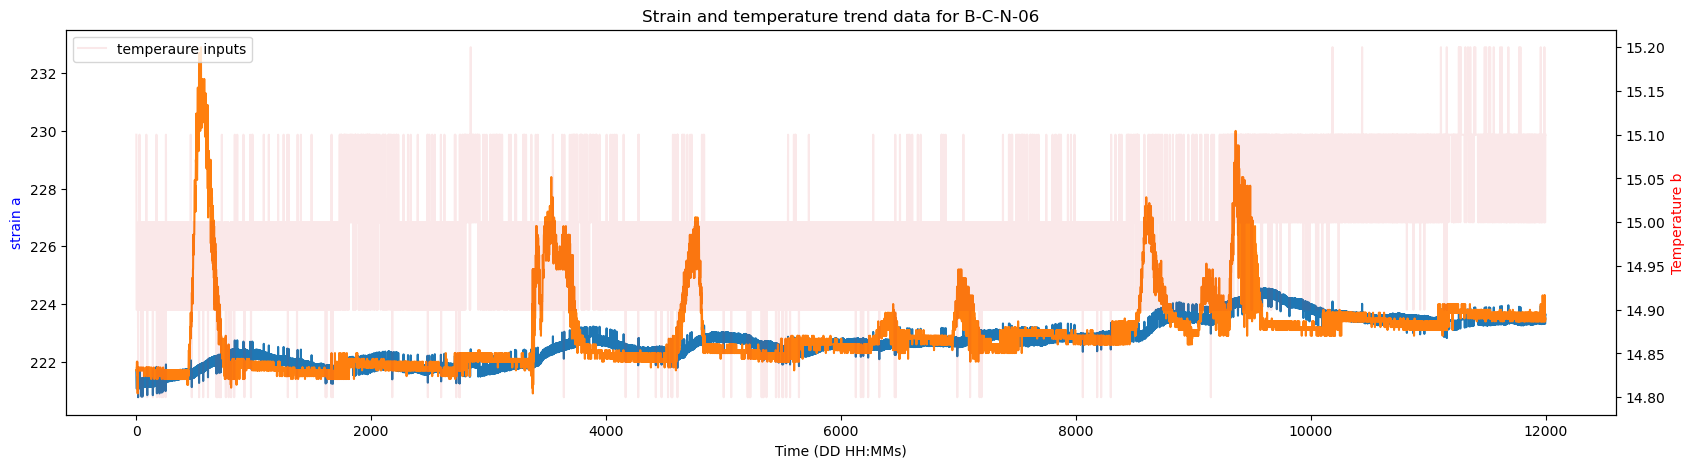

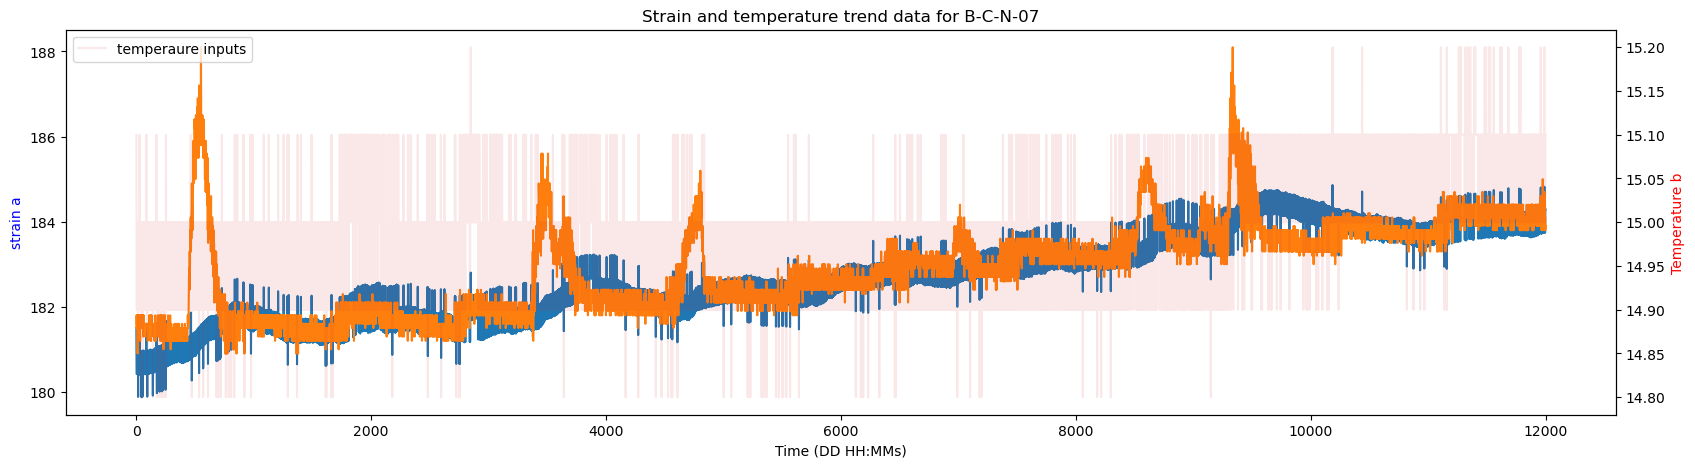

In [29]:
for i in range(len(filtered)):
    fig, ax1 = plt.subplots(figsize=(20,5))
    ax2 = ax1.twinx()

    # Plot the data on the respective axes
    ax2.plot(inputs[0]['data'], alpha = 0.1, label='temperaure inputs', color='tab:red')
    ax1.plot(filtered[i]['data'], label = 'pf filtered '+ filtered[i]['name'], color='tab:blue')
    ax1.plot(measurements[i]['data'], label='strain measurement ' + measurements[i]['name'], color='tab:orange')
    plt.legend()
    # Set the labels and limits for the axes
    ax1.set_xlabel('Time (DD HH:MMs)')
    ax1.set_ylabel('strain a', color='blue')
    ax2.set_ylabel('Temperature b', color='red')
    plt.title('Strain and temperature trend data for ' + measurements[i]['name'])
    # Show the plot
    plt.show()

In [ ]:
pfb_states = pfb.export_states()

# 

In [ ]:
import json
with open('pfb_states.json', 'w') as json_file:
    json.dump(pfb_states, json_file, indent=4)

In [ ]:
import pickle
with open('pfb_states.pkl', 'wb') as f:
    pickle.dump(pfb_states, f)